# Análise de Chamados do 1746 no Rio de Janeiro

Este notebook contém as respostas para as 9 perguntas sobre os chamados do 1746 no Rio de Janeiro.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import basedosdados as bd

# Configurar o projeto de faturamento
billing_project_id = "dados-rio-433101"

# Função para executar queries
def run_query(query):
    return bd.read_sql(query, billing_project_id=billing_project_id)

## 1. Quantos chamados foram abertos no dia 01/04/2023?

In [3]:
query1 = """
SELECT COUNT(*) as total_chamados
FROM `datario.adm_central_atendimento_1746.chamado`
WHERE DATE(data_inicio) = '2023-04-01'
"""

result1 = run_query(query1)
print(f"Chamados abertos em 01/04/2023: {result1['total_chamados'][0]}")

Downloading: 100%|██████████|
Chamados abertos em 01/04/2023: 1756


## 2. Qual o tipo de chamado que teve mais chamados abertos no dia 01/04/2023?

In [4]:
query2 = """
SELECT tipo, COUNT(*) as total_chamados
FROM `datario.adm_central_atendimento_1746.chamado`
WHERE DATE(data_inicio) = '2023-04-01'
GROUP BY tipo
ORDER BY total_chamados DESC
LIMIT 1
"""

result2 = run_query(query2)
print(f"Tipo de chamado mais frequente em 01/04/2023: {result2['tipo'][0]} ({result2['total_chamados'][0]} chamados)")

Downloading: 100%|██████████|
Tipo de chamado mais frequente em 01/04/2023: Estacionamento irregular (366 chamados)


## 3. Quais os nomes dos 3 bairros que mais tiveram chamados abertos nesse dia?

Downloading: 100%|██████████|
Os 3 bairros com mais chamados em 01/04/2023:
       nome_bairro  total_chamados
0     Campo Grande             113
1           Tijuca              89
2  Barra da Tijuca              59


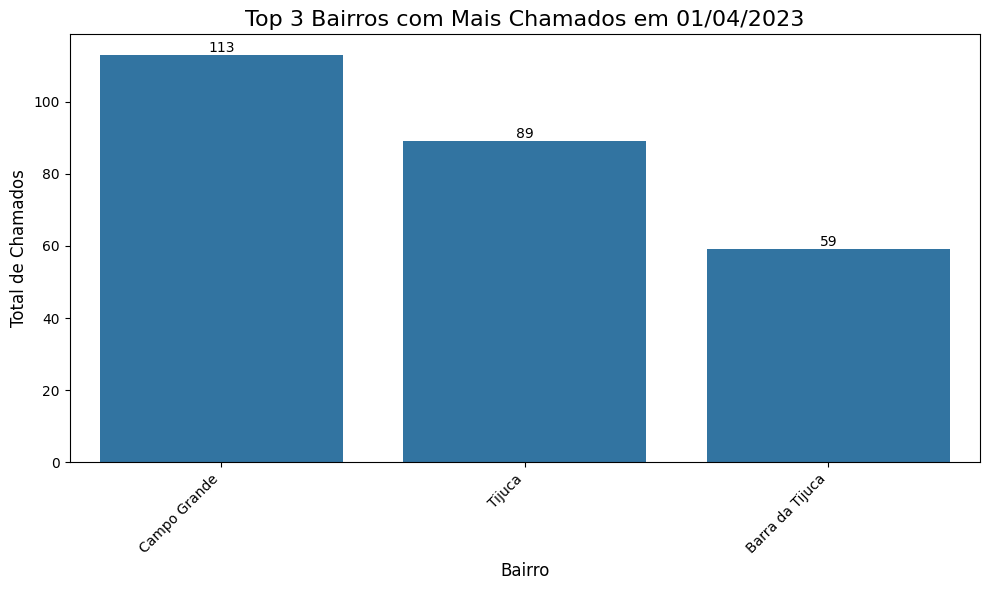

In [23]:
query3 = """
SELECT b.nome as nome_bairro, COUNT(*) as total_chamados
FROM `datario.adm_central_atendimento_1746.chamado` c
JOIN `datario.dados_mestres.bairro` b ON c.id_bairro = b.id_bairro
WHERE DATE(c.data_inicio) = '2023-04-01'
GROUP BY b.nome
ORDER BY total_chamados DESC
LIMIT 3
"""

result3 = run_query(query3)
print("Os 3 bairros com mais chamados em 01/04/2023:")
print(result3)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='nome_bairro', y='total_chamados', data=result3)

# Customize the plot
plt.title('Top 3 Bairros com Mais Chamados em 01/04/2023', fontsize=16)
plt.xlabel('Bairro', fontsize=12)
plt.ylabel('Total de Chamados', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(result3['total_chamados']):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 4. Qual o nome da subprefeitura com mais chamados abertos nesse dia?

In [6]:
query4 = """
SELECT b.subprefeitura as nome_subprefeitura, COUNT(*) as total_chamados
FROM `datario.adm_central_atendimento_1746.chamado` c
JOIN `datario.dados_mestres.bairro` b ON c.id_bairro = b.id_bairro
WHERE DATE(c.data_inicio) = '2023-04-01'
GROUP BY b.subprefeitura
ORDER BY total_chamados DESC
LIMIT 1
"""

result4 = run_query(query4)
print(f"Subprefeitura com mais chamados em 01/04/2023: {result4['nome_subprefeitura'][0]} ({result4['total_chamados'][0]} chamados)")

Downloading: 100%|██████████|
Subprefeitura com mais chamados em 01/04/2023: Zona Norte (510 chamados)


## 5. Existe algum chamado aberto nesse dia que não foi associado a um bairro ou subprefeitura na tabela de bairros? Se sim, por que isso acontece?

In [7]:
query5 = """
SELECT COUNT(*) as chamados_sem_bairro_ou_subprefeitura
FROM `datario.adm_central_atendimento_1746.chamado` c
LEFT JOIN `datario.dados_mestres.bairro` b ON c.id_bairro = b.id_bairro
WHERE DATE(c.data_inicio) = '2023-04-01'
  AND (b.nome IS NULL OR b.subprefeitura IS NULL)
"""

result5 = run_query(query5)
print(f"Chamados sem bairro ou subprefeitura em 01/04/2023: {result5['chamados_sem_bairro_ou_subprefeitura'][0]}")

print("\nExplicação:")
print("Os chamados sem associação a bairro ou subprefeitura podem estar relacionados a serviços móveis,")
print("como ônibus, ou a áreas não mapeadas na tabela de bairros. Isso pode ocorrer devido a:")
print("1. Chamados feitos em trânsito ou em áreas de fronteira entre bairros;")
print("2. Erros na entrada de dados ou na geolocalização;")
print("3. Áreas recentemente desenvolvidas ou não oficialmente reconhecidas como bairros.")

Downloading: 100%|██████████|
Chamados sem bairro ou subprefeitura em 01/04/2023: 73

Explicação:
Os chamados sem associação a bairro ou subprefeitura podem estar relacionados a serviços móveis,
como ônibus, ou a áreas não mapeadas na tabela de bairros. Isso pode ocorrer devido a:
1. Chamados feitos em trânsito ou em áreas de fronteira entre bairros;
2. Erros na entrada de dados ou na geolocalização;
3. Áreas recentemente desenvolvidas ou não oficialmente reconhecidas como bairros.


## 6. Quantos chamados com o subtipo "Perturbação do sossego" foram abertos desde 01/01/2022 até 31/12/2023 (incluindo extremidades)?

In [8]:
query6 = """
SELECT COUNT(*) as total_chamados
FROM `datario.adm_central_atendimento_1746.chamado`
WHERE subtipo = 'Perturbação do sossego'
  AND data_inicio BETWEEN '2022-01-01' AND '2023-12-31 23:59:59'
"""

result6 = run_query(query6)
print(f"Chamados de 'Perturbação do sossego' entre 2022-2023: {result6['total_chamados'][0]}")

Downloading: 100%|██████████|
Chamados de 'Perturbação do sossego' entre 2022-2023: 42830


## 7. Selecione os chamados com esse subtipo que foram abertos durante os eventos contidos na tabela de eventos (Reveillon, Carnaval e Rock in Rio).

In [14]:
query7 = """
SELECT c.*,  e.evento as evento
FROM `datario.adm_central_atendimento_1746.chamado` c
JOIN `datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos` e
  ON c.data_inicio BETWEEN e.data_inicial AND e.data_final
WHERE c.subtipo = 'Perturbação do sossego'
  AND e.evento IN ('Reveillon', 'Carnaval', 'Rock in Rio')
LIMIT 10  -- Limitando a 10 resultados para visualização
"""

result7 = run_query(query7)
print("Amostra de chamados de 'Perturbação do sossego' durante eventos:")
from IPython.display import display
display(result7)

Downloading: 100%|██████████|
Amostra de chamados de 'Perturbação do sossego' durante eventos:


,id_chamado,id_origem_ocorrencia,data_inicio,data_fim,id_bairro,id_territorialidade,id_logradouro,numero_logradouro,id_unidade_organizacional,nome_unidade_organizacional,id_unidade_organizacional_mae,unidade_organizacional_ouvidoria,categoria,id_tipo,tipo,id_subtipo,subtipo,status,longitude,latitude,data_alvo_finalizacao,data_alvo_diagnostico,data_real_diagnostico,tempo_prazo,prazo_unidade,prazo_tipo,dentro_prazo,situacao,tipo_situacao,justificativa_status,reclamacoes,data_particao,evento
0,18327981,11,2023-02-18 09:22:09,2023-02-24 09:58:53,33,2,68627,412,70,GM-RIO - Guarda Municipal do Rio de Janeiro,GM-RIO - Guarda Municipal do Rio de Janeiro,False,Serviço,1615,Perturbação do sossego,5071,Perturbação do sossego,Sem possibilidade de atendimento,-43.234447,-22.925071,2023-02-25 09:22:00,NaT,NaT,<NA>,D,F,No prazo,Encerrado,Não atendido,None,0,2023-02-01,Carnaval
1,18328048,1,2023-02-18 09:48:20,2023-02-24 09:59:51,125,4,155432,290,70,GM-RIO - Guarda Municipal do Rio de Janeiro,GM-RIO - Guarda Municipal do Rio de Janeiro,False,Serviço,1615,Perturbação do sossego,5071,Perturbação do sossego,Sem possibilidade de atendimento,-43.372471,-22.888086,2023-02-25 09:48:00,NaT,NaT,<NA>,D,F,No prazo,Encerrado,Não atendido,None,0,2023-02-01,Carnaval
2,18329482,13,2023-02-18 21:02:22,2023-02-24 10:49:58,128,4,232686,81,70,GM-RIO - Guarda Municipal do Rio de Janeiro,GM-RIO - Guarda Municipal do Rio de Janeiro,False,Serviço,1615,Perturbação do sossego,5071,Perturbação do sossego,Sem possibilidade de atendimento,-43.297778,-23.011553,2023-02-25 21:02:00,NaT,NaT,<NA>,D,F,No prazo,Encerrado,Não atendido,None,0,2023-02-01,Carnaval
3,18328714,17,2023-02-18 14:11:36,2023-02-24 10:09:57,20,2,69435,38,70,GM-RIO - Guarda Municipal do Rio de Janeiro,GM-RIO - Guarda Municipal do Rio de Janeiro,False,Serviço,1615,Perturbação do sossego,5071,Perturbação do sossego,Sem possibilidade de atendimento,-43.193993,-22.952155,2023-02-25 14:11:00,NaT,NaT,<NA>,D,F,No prazo,Encerrado,Não atendido,None,0,2023-02-01,Carnaval
4,18329734,17,2023-02-19 00:46:24,2023-02-27 08:37:48,132,4,346569,26,70,GM-RIO - Guarda Municipal do Rio de Janeiro,GM-RIO - Guarda Municipal do Rio de Janeiro,False,Serviço,1615,Perturbação do sossego,5071,Perturbação do sossego,Sem possibilidade de atendimento,NaN,NaN,2023-02-26 00:46:00,NaT,NaT,<NA>,D,F,Fora do prazo,Encerrado,Não atendido,None,0,2023-02-01,Carnaval
5,18075937,1,2022-12-30 01:38:14,2023-01-02 10:02:09,43,3,33563,8,70,GM-RIO - Guarda Municipal do Rio de Janeiro,GM-RIO - Guarda Municipal do Rio de Janeiro,False,Serviço,1615,Perturbação do sossego,5071,Perturbação do sossego,Sem possibilidade de atendimento,NaN,NaN,2023-01-06 01:38:00,NaT,NaT,<NA>,D,F,No prazo,Encerrado,Não atendido,None,0,2022-12-01,Reveillon
6,18078548,1,2022-12-31 07:59:03,2023-01-04 07:36:42,49,3,102905,620,70,GM-RIO - Guarda Municipal do Rio de Janeiro,GM-RIO - Guarda Municipal do Rio de Janeiro,False,Serviço,1615,Perturbação do sossego,5071,Perturbação do sossego,Sem possibilidade de atendimento,NaN,NaN,2023-01-07 07:59:00,NaT,NaT,<NA>,D,F,No prazo,Encerrado,Não atendido,None,0,2022-12-01,Reveillon
7,18078209,11,2022-12-30 21:05:12,2023-01-10 09:38:54,74,3,36111,506,70,GM-RIO - Guarda Municipal do Rio de Janeiro,GM-RIO - Guarda Municipal do Rio de Janeiro,False,Serviço,1615,Perturbação do sossego,5071,Perturbação do sossego,Sem possibilidade de atendimento,-43.310347,-22.845654,2023-01-06 21:05:00,NaT,NaT,<NA>,D,F,Fora do prazo,Encerrado,Não atendido,None,0,2022-12-01,Reveillon
8,18079582,11,2022-12-31 23:42:25,2023-01-10 10:58:12,139,5,29868,234,70,GM-RIO - Guarda Municipal do Rio de Janeiro,GM-RIO - Guarda Municipal do Rio de Janeiro,False,Serviço,1615,Perturbação do sossego,5071,Perturbação do sossego,Sem possibilidade de atendimento,NaN,NaN,2023-01-07 23:42:00,NaT,NaT,<NA>,D,F,Fora do prazo,Encerrado,Não atendido,None,0,2022-12-01,Reveillon
9,17663234,11,2022-09-03 18:49:04,2022-09-04 09:48:09,28,2,79236,284,70,GM-RIO - Guarda Municipal do Rio de Janeir

## 8. Quantos chamados desse subtipo foram abertos em cada evento?

Downloading: 100%|██████████|
Chamados de 'Perturbação do sossego' por evento:
        evento  total_chamados
0  Rock in Rio             518
1    Reveillon              81
2     Carnaval             197


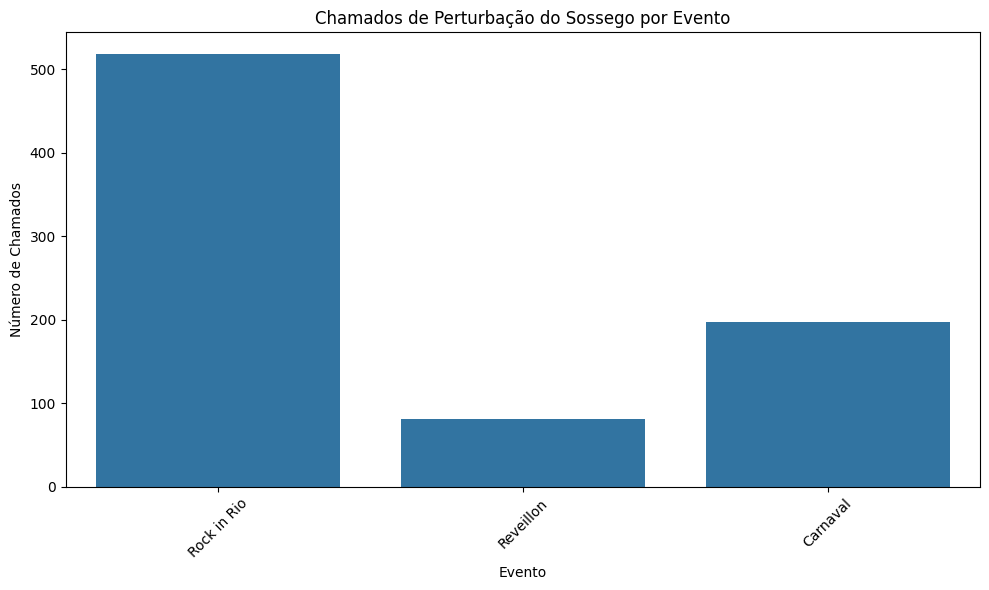

In [17]:
query8 = """
SELECT e.evento, COUNT(*) as total_chamados
FROM `datario.adm_central_atendimento_1746.chamado` c
JOIN `datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos` e
ON c.data_inicio BETWEEN e.data_inicial AND e.data_final
WHERE c.subtipo = 'Perturbação do sossego'
AND e.evento IN ('Reveillon', 'Carnaval', 'Rock in Rio')
GROUP BY e.evento
"""

result8 = run_query(query8)
print("Chamados de 'Perturbação do sossego' por evento:")
print(result8)

# Visualização
plt.figure(figsize=(10, 6))
sns.barplot(x='evento', y='total_chamados', data=result8) 
plt.title('Chamados de Perturbação do Sossego por Evento')
plt.xlabel('Evento')
plt.ylabel('Número de Chamados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9. Qual evento teve a maior média diária de chamados abertos desse subtipo?

In [20]:
query9 = """
SELECT e.evento, 
     COUNT(*) / DATE_DIFF(e.data_final, e.data_inicial, DAY) as media_diaria_chamados
FROM `datario.adm_central_atendimento_1746.chamado` c
JOIN `datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos` e
ON c.data_inicio BETWEEN e.data_inicial AND e.data_final
WHERE c.subtipo = 'Perturbação do sossego'
AND e.evento IN ('Reveillon', 'Carnaval', 'Rock in Rio')
GROUP BY e.evento, e.data_inicial, e.data_final
ORDER BY media_diaria_chamados DESC
LIMIT 1
"""

result9 = run_query(query9)
print(f"Evento com maior média diária de chamados: {result9['evento'].iloc[0]} ({result9['media_diaria_chamados'].iloc[0]:.2f} chamados/dia)")

Downloading: 100%|██████████|
Evento com maior média diária de chamados: Rock in Rio (106.00 chamados/dia)


## 10. Compare as médias diárias de chamados abertos desse subtipo durante os eventos específicos e a média diária considerando todo o período de 01/01/2022 até 31/12/2023.

Downloading: 100%|██████████|
Comparação das médias diárias de chamados de 'Perturbação do sossego':
         periodo  media_diaria_chamados
0    Rock in Rio             106.000000
1    Rock in Rio             102.000000
2       Carnaval              65.666667
3  Período Total              58.671233
4      Reveillon              40.500000


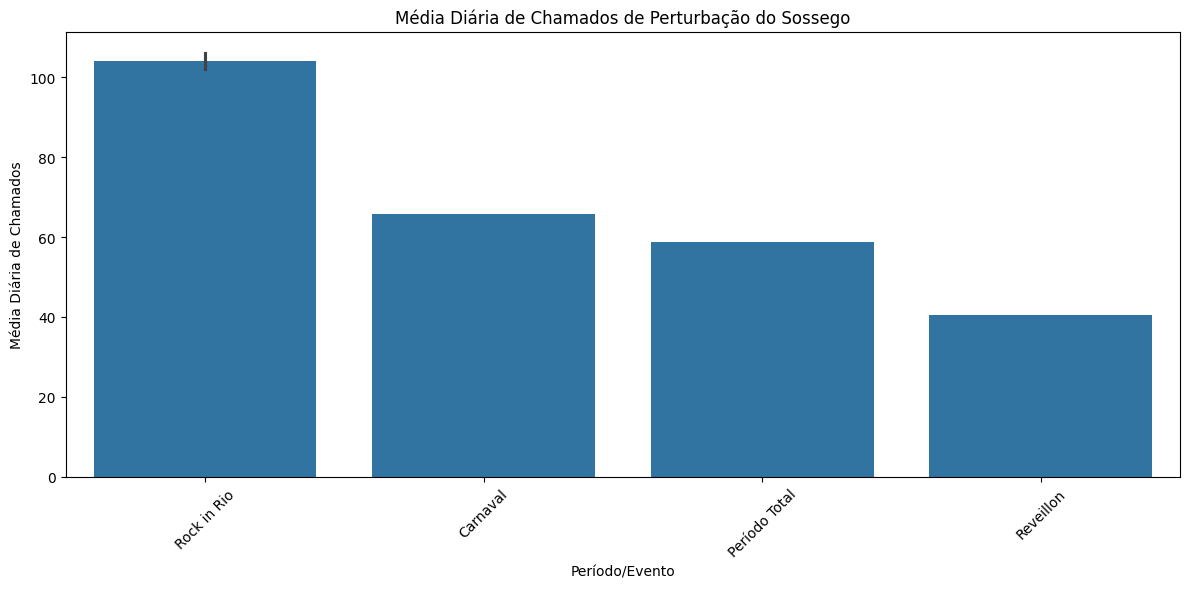

In [22]:
query10 = """
WITH eventos_media AS (
  SELECT e.evento, 
         COUNT(*) / DATE_DIFF(e.data_final, e.data_inicial, DAY) as media_diaria_chamados
  FROM `datario.adm_central_atendimento_1746.chamado` c
  JOIN `datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos` e
    ON c.data_inicio BETWEEN e.data_inicial AND e.data_final
  WHERE c.subtipo = 'Perturbação do sossego'
    AND e.evento IN ('Reveillon', 'Carnaval', 'Rock in Rio')
  GROUP BY e.evento, e.data_inicial, e.data_final
),
periodo_total_media AS (
  SELECT COUNT(*) / 730 as media_diaria_chamados  -- 730 dias entre 01/01/2022 e 31/12/2023
  FROM `datario.adm_central_atendimento_1746.chamado`
  WHERE subtipo = 'Perturbação do sossego'
    AND data_inicio BETWEEN '2022-01-01' AND '2023-12-31 23:59:59'
)
SELECT 'Período Total' as periodo, media_diaria_chamados
FROM periodo_total_media
UNION ALL
SELECT evento, media_diaria_chamados
FROM eventos_media
ORDER BY media_diaria_chamados DESC
"""

result10 = run_query(query10)
print("Comparação das médias diárias de chamados de 'Perturbação do sossego':")
print(result10)

# Visualização
plt.figure(figsize=(12, 6))
sns.barplot(x='periodo', y='media_diaria_chamados', data=result10)
plt.title('Média Diária de Chamados de Perturbação do Sossego')
plt.xlabel('Período/Evento')
plt.ylabel('Média Diária de Chamados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusões

1. No dia 01/04/2023, foram abertos 1756 chamados.
2. O tipo de chamado mais frequente nesse dia foi "Estacionamento irregular", com 366 chamados.
3. Os três bairros com mais chamados foram Campo Grande, Tijuca e Barra da Tijuca.
4. A subprefeitura com mais chamados foi Zona Norte.
5. Existem 73 chamados sem associação a bairro ou subprefeitura, possivelmente devido a serviços móveis ou áreas não mapeadas.
6. Entre 01/01/2022 e 31/12/2023, houve 42830 chamados de 'Perturbação do sossego'.
7. Durante os eventos (Reveillon, Carnaval e Rock in Rio), houve um aumento nos chamados de 'Perturbação do sossego'.
8. O evento com mais chamados desse subtipo foi Rock in Rio.
9. O evento com a maior média diária de chamados foi Rock in Rio, com 106 chamados por dia.
10. Comparando com a média diária do período total, os eventos específicos tendem a ter uma média mais alta de chamados de 'Perturbação do sossego'.

Estas análises fornecem insights valiosos sobre os padrões de chamados no Rio de Janeiro, especialmente relacionados à perturbação do sossego durante eventos importantes. Esses dados podem ser úteis para o planejamento urbano, alocação de recursos e estratégias de segurança pública.